In [2]:
import numpy as np

def lu2(A): # written sep 20, 2022, to test something
    
    #Get the number of rows
    n = A.shape[0]
    
    U = A.copy()
    L = np.eye(n, dtype=np.double)
    
    #Loop over rows
    for i in range(n):
            
        #Eliminate entries below i with row operations 
        #on U and reverse the row operations to 
        #manipulate L
        factor = U[i+1:, i] / U[i, i]
        L[i+1:, i] = factor
        factor=factor.reshape(-1,1)
        other_factor=U[i].reshape(1,-1) # we want to define outer type products. Note shapes involved! 
        print('factor.shape=', factor.shape)
        print('other_factor.shape=', other_factor.shape)
 
            
        U[i+1:, :] =U[i+1:, :] - np.dot(factor,other_factor) #<--by above comment, this also works!     
        
    return L, U  #Does not return a permutation matrix P!

In [ ]:
A = np.array([[3.5, 7., 8.3], [5.73, 0., -5.], [4., 18., 22.]])
[L,U]=lu2(A)
print('A=', A, '\n')
print('L=', L)
print('\n')
print('U=', U)
print('\n')
print('Verification: LU=\n',  np.dot(L, U))  #matrix product L*U np.dot(L,U)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm #<--this allows a color palette to loop through when plot

x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
print('the model scored=', r_sq)
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")
b_0=model.intercept_
b_1=model.coef_  #<---slope


the model scored= 0.715875613747954
intercept: 5.633333333333329
slope: [0.54]


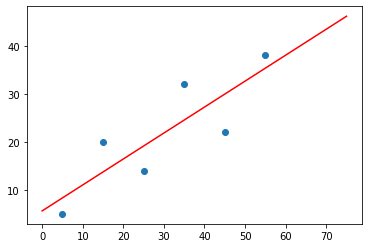

In [8]:
lengths=np.array([0,75])
y_pred=b_0+b_1*lengths
plt.clf()
plt.scatter(x,y)
plt.plot(lengths, y_pred, color='r')

In [ ]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)